# Fundamentals of Information Systems

## Python Programming (for Data Science)

### Master's Degree in Data Science

#### Giorgio Maria Di Nunzio
#### (Courtesy of Gabriele Tolomei FIS 2018-2019)
<a href="mailto:giorgiomaria.dinunzio@unipd.it">giorgiomaria.dinunzio@unipd.it</a><br/>
University of Padua, Italy<br/>
2021/2022<br/>

# Lecture 10: Data Visualization with <code>matplotlib</code>

## Motivation

-  Making informative visualizations (sometimes called **plots**) is one of the most important tasks in data analysis. 

-  This may be a part of the "exploratory process"; for example, helping identify outliers, needed data transformations, or coming up with ideas for models. 

-  Python has many add-on libraries for making static or dynamic visualizations, but we will be focusing on [<code>**matplotlib**</code>](http://matplotlib.sourceforge.net) and libraries that build on top of it.

## What is <code>matplotlib</code>

-  <code>**matplotlib**</code> is a desktop plotting package designed for creating (mostly two-dimensional) plots. 

-  The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. 

-  The matplotlib and IPython communities have collaborated to simplify interactive plotting from the IPython shell, as well as Jupyter notebook. 

-  It supports various GUI backends on all operating systems and additionally can export graphics to all of the common vector and raster graphics formats: **PDF**, **SVG**, **JPG**, **PNG**, **BMP**, **GIF**, etc.

## A <code>matplotlib</code> API Primer

In [39]:
"""
Again, matplotlib is included in Anaconda and the only thing we need
to do for using it is just to import it!
Actually, we need to import a "sub-module" of the whole matplotlib library, 
i.e., matplotlib.pyplot (https://matplotlib.org/api/pyplot_summary.html)
Let's also import both numpy and pandas, as those might be needed as well.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
#%matplotlib inline


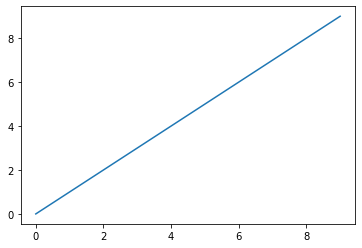

In [40]:
# Let's try to make our first matplotlib plot
# When 'plot' is given with just a single input argument, 
# this is considered as y values, 
# whilst x values are implicitly taken from the array [0..len(y)-1]
# '_' is a convention which is used in CPython interpreter to hold the result 
# of the last executed expression/statement in an interactive interpreter session.
_ = plt.plot(np.arange(10))

## Figures and Subplots

-  Plots in <code>**matplotlib**</code> are encapsulated within a <code>**Figure**</code> object. 

-  A new <code>**Figure**</code> object can be created with <code>**plt.figure**</code>.

-  In IPython, an empty plot window will appear, but in Jupyter Notebook nothing will be shown until we use a few more commands. 

-  <code>**plt.figure**</code> has a number of options, notably <code>**figsize**</code> will guarantee the figure has a certain size and aspect ratio if saved to disk.

-  We can't make a plot with a blank figure. We have to create one or more subplots using <code>**add_subplot**</code>.

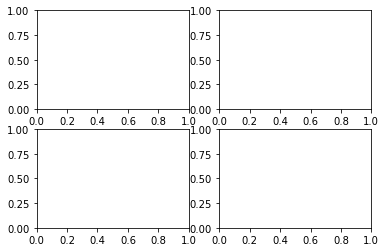

In [41]:
# Create a Figure object
fig = plt.figure()

# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)

# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)

# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)

#Add a 2x2 subplot and selecting the 4th one
ax4 = fig.add_subplot(2, 2, 4)

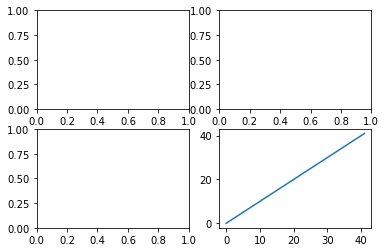

In [42]:
"""
If we issue a plt.plot command, matplotlib will draw on the last figure and subplot used
(creating one if necessary), thus hiding the figure and subplot creation
"""
# Create a Figure object
fig = plt.figure()

# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)

# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)

# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)

#Add a 2x2 subplot and selecting the 4th one
ax4 = fig.add_subplot(2, 2, 4)

_ = plt.plot(np.arange(42))

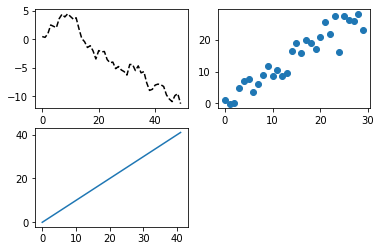

In [43]:
"""
The objects returned by fig.add_subplot above are AxesSubplot objects, 
We can directly plot on the other empty subplots by calling each one's instance methods.
"""
# Set the seed for random experiments
np.random.seed(42)

# Create a Figure object
fig = plt.figure()

# Add a 2x2 subplot and selecting the 1st one (numbering starts from 1)
ax1 = fig.add_subplot(2, 2, 1)

# Add a 2x2 subplot and selecting the 2nd one
ax2 = fig.add_subplot(2, 2, 2)

# Add a 2x2 subplot and selecting the 3rd one
ax3 = fig.add_subplot(2, 2, 3)

# This will plot on the latest AxesSubplot (i.e., ax3)
_ = plt.plot(np.arange(42))

# Call the instance method on each AxesSubplot
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.
_ = ax1.plot(np.random.randn(50).cumsum(), 'k--') #First subplot
_ = ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) #Second subplot

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

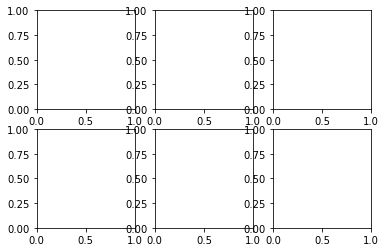

In [44]:
"""
Since creating a figure with a grid of subplots is such a common task, 
there is a convenience method 'plt.subplots' that creates a new figure 
and returns a numpy array containing the created subplot objects.
"""
# Create a figure which is made of 6 subplots (2x3)
fig, axes = plt.subplots(2, 3)   #plt.subplots(x, y) returns an array containing the created subplots objects.
axes

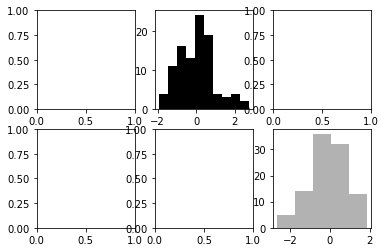

In [45]:
"""
This is very useful as the axes array can be easily indexed like a two-dimensional array; 
for example, axes[0, 1].
We can also indicate that subplots should have the same X or Y axis 
using 'sharex' and 'sharey', respectively. This is especially useful 
when comparing data on the same scale.
Otherwise, matplotlib auto-scales plot limits independently.
"""
# Set the seed for random experiments
np.random.seed(42)

# Create a figure whic is made of 6 subplots (2x3)
fig, axes = plt.subplots(2, 3)

# Plot on the bottom-right corner subplot 
_ = axes[1, 2].hist(np.random.randn(100), bins=5, color='k', alpha=0.3)

_ = axes[0, 1].hist(np.random.randn(100), bins=10, color='k', alpha=1.0)


## Colors, Markers, and Line Styles

-  The main <code>**plot**</code> function accepts arrays of $x$ and $y$ coordinates, and optionally a string abbreviation indicating color and line style. 

-  For example, to plot $x$ versus $y$ with green dashes, you would execute:

```python
ax.plot(x, y, 'g--')
```
Or, equivalently:
```python
ax.plot(x, y, linestyle='--', color='g')
```

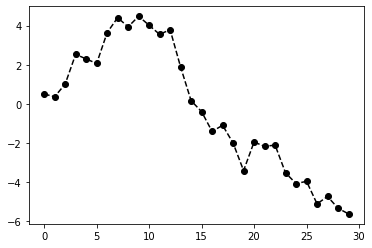

In [46]:
"""
Line plots can additionally have markers to highlight the actual data points. 
Since matplotlib creates a continuous line plot, interpolating between points, 
it can occasionally be unclear where the points lie. 
The marker can be part of the style string, which must have color 
followed by marker type and line style.
"""
np.random.seed(42)
_ = plt.plot(np.random.randn(30).cumsum(), 'ko--')

# Alternatively, we can write the above explicitly as follows
#plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

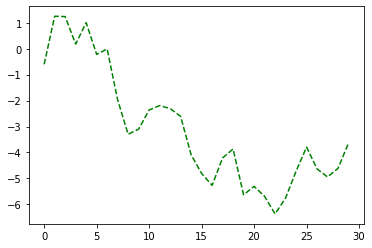

In [47]:
_ = plt.plot(np.random.randn(30).cumsum(), linestyle='--', color='g')

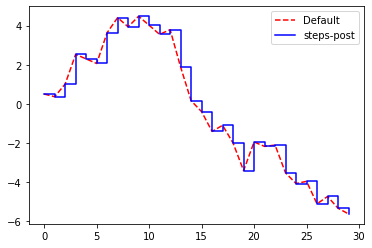

In [48]:
"""
If we want to change the default interpolation using line plots,
we can specify the argument 'drawstyle'
"""
np.random.seed(42)

data = np.random.randn(30).cumsum()

# First plot using the default interpolation
_ = plt.plot(data, 'r--', label='Default')

# Second plot (on the same Figure object) using steps
_ = plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')

# Insert the legend located in the best possible position
_ = plt.legend(loc='best') #location = loc

## Ticks, Labels, and Legends

-  2 possible ways of decorating plots: using the procedural  <code>**matplotlib.pyplot**</code> interface or object-oriented **matplotlib API**.

-  The pyplot interface exposes methods like <code>**xlim**</code> (range), <code>**xticks**</code> (tick locations), and <code>**xticklabels**</code> (tick labels).

-  They can be used in two ways:
    -  with no arguments returns the current parameter value. For example, <code>**plt.xlim()**</code> returns the current $x$-axis plotting range;
    -  with parameters sets the parameter value. So, <code>**plt.xlim([0, 10])**</code>, sets the $x$-axis range to 0 to 10.

## Ticks, Labels, and Legends

-  All such methods act on the active or most recently-created <code>**AxesSubplot**</code>. 

-  Each of them corresponds to two methods on the subplot object itself.

-  In the case of <code>**xlim**</code> these are <code>**ax.get_xlim**</code> and <code>**ax.set_xlim**</code>.

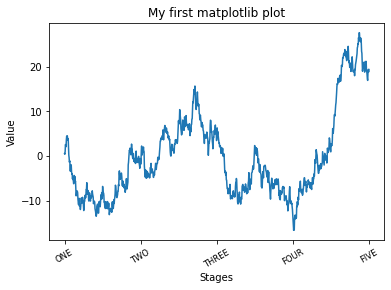

In [49]:
"""
Let's clarify the above concepts with an example.
"""
np.random.seed(42)

# Create a Figure object
fig = plt.figure()

# Create a 1x1 subplot and select this
ax = fig.add_subplot(1, 1, 1)

# Draw some random plot
_ = ax.plot(np.random.randn(1000).cumsum())

# To change the x-axis ticks, we use 'set_xticks' and 'set_xticklabels'. 
# The former instructs matplotlib where to place the ticks along the data range; 
# by default these locations will also be the labels. 
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# But we can set any other values as the labels using set_xticklabels
labels = ax.set_xticklabels(['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                            rotation=30, fontsize='small')

# We can also set a title to the plot
_ = ax.set_title('My first matplotlib plot')

# And x-axis (y-axis) labels
_ = ax.set_xlabel('Stages')
_ = ax.set_ylabel('Value')

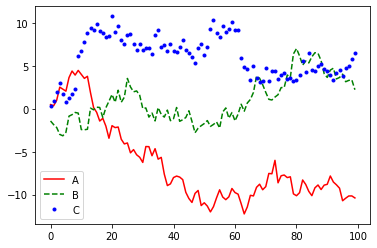

In [50]:
"""
Suppose we have multiple plots on the same Figure (or AxesSubplot).
Legends may help us distinguish between those plots.
"""
np.random.seed(42)

fig = plt.figure() 

ax = fig.add_subplot(1, 1, 1)
_ = ax.plot(np.random.randn(100).cumsum(), 'r', label='A')
_ = ax.plot(np.random.randn(100).cumsum(), 'g--', label='B')
_ = ax.plot(np.random.randn(100).cumsum(), 'b.', label='C')
_ = ax.legend(loc='best')

##  Saving Plots to File

-  The active figure can be saved to file using <code>**plt.savefig**</code>. 

-  This method is equivalent to the figure object's <code>**savefig**</code> instance method. 

-  For example, to save an **SVG** version of a figure, we can do as follows:
```python
plt.savefig('path/to/plotfile.svg')
```

## Saving Plots to File

-  The file type is inferred from the file extension.

-  Other important options might be: 
    -  <code>**dpi**</code>, which controls the dots-per-inch resolution;
    -  <code>**bbox_inches**</code>, which can trim the whitespace around the actual figure. 
    
-  To get the same plot as a **PNG** above with minimal whitespace around the plot and at 400 DPI:
```
plt.savefig('path/to/plotfile.png', dpi=400, bbox_inches='tight')
```

## <code>matplotlib</code> Configuration

-  <code>**matplotlib**</code> comes configured with **color schemes** and defaults options. 

-  Nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. 

-  <code>**matplotlib**</code> configuration system can be accessed either programmatically from Python using the <code>**rc**</code> method, or using an external configuration file (e.g., <code>**~/.matplotlibrc**</code>).

# Plotting with <code>pandas</code> and <code>seaborn</code>

-  <code>**matplotlib**</code> can be a fairly low level tool, which allows us to assemble a plot from its base components: the data, the type of plot (*line*, *bar*, *box*, *scatter*, *contour*, etc.), legend, title, tick labels, and other annotations. 
 
-  In <code>**pandas**</code> we may have multiple columns of data, along with row and column labels.

-  <code>**pandas**</code> has built-in methods which simplify creating visualizations from <code>**DataFrame**</code> and <code>**Series**</code> objects. 

-  On top of that, there is another useful statistical graphics library, called [<code>**seaborn**</code>](https://seaborn.pydata.org/)

## Line Plots

-  <code>**Series**</code> and <code>**DataFrame**</code> each have a <code>**plot**</code> attribute for making some basic plot types. 

-  By default, <code>**plot()**</code> makes **line plots**.

-  Most of <code>**pandas**</code>'s plotting methods accept an optional <code>**ax**</code> parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

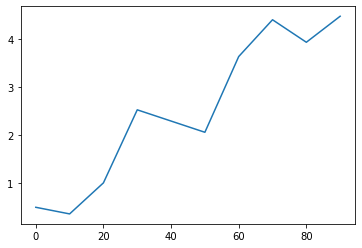

In [51]:
"""
Default line plots with pandas Series
"""
np.random.seed(42)

# Create a Series
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
_ = s.plot()

## Line Plots with <code>Series</code>

-  The <code>**Series**</code> object's index is passed to <code>**matplotlib**</code> for plotting on the $x$-axis (this can be disabled by passing <code>**use_index=False**</code>). 

-  The $x$-axis ticks and limits can be adjusted using the <code>**xticks**</code> and <code>**xlim**</code> options, and $y$-axis respectively using <code>**yticks**</code> and <code>**ylim**</code>.

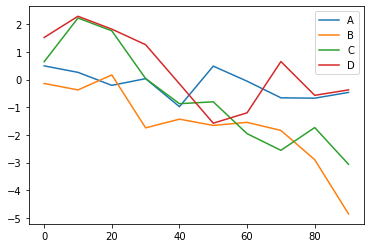

In [52]:
"""
Default line plots with pandas DataFrame
"""
np.random.seed(42)

# Create a DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))

_ = df.plot()

In [53]:
np.random.seed(42)

# Generate a 4x3 matrix of random numbers
matrix = np.random.randn(4, 3)
print("Original Matrix:")
print(matrix)

# Calculate cumulative sum along axis 0 (columns)
cumulative_sum = matrix.cumsum(0)  #the 0 is for the columns, 1 would be used for rows. 
print("\nCumulative Sum along Columns:")
print(cumulative_sum)

Original Matrix:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]

Cumulative Sum along Columns:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 2.01974401 -0.37241768  0.41355158]
 [ 3.59895682  0.39501705 -0.0559228 ]
 [ 4.14151687 -0.06840064 -0.52165256]]


## Line Plots with <code>DataFrame</code>

-  <code>**DataFrame**</code>'s <code>**plot**</code> method plots each of its columns as a different line on the same subplot, creating a legend automatically.

-  The <code>**plot**</code> attribute contains a "family" of methods for different plot types. 

-  For example, <code>**DataFrame.plot()**</code> is equivalent to <code>**DataFrame.plot.line()**</code>. 

## Bar Plots

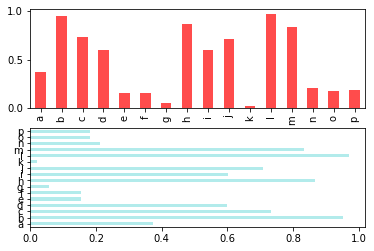

In [54]:
"""
The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. 
In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) tick.
"""
np.random.seed(42)

# Create a figure and subplot associated with it
fig, axes = plt.subplots(2, 1)

# Create a random series of values indexed by letter (i.e., chars)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# Specify the subplot where to place this bar plot
_ = data.plot.bar(ax=axes[0], color='r', alpha=0.7)

# Specify the subplot where to place this horizontal bar plot
_ = data.plot.barh(ax = axes[1], color='c', alpha=0.3)

In [55]:
"""
With a DataFrame, bar plots a group of bars for each row.
Fixed a row, each group of bars is made of the values contained in that row, side by side
(i.e., each bar group contains as many values as the number of columns).
"""
np.random.seed(42)

df = pd.DataFrame(np.random.rand(6, 4),    #rand != randn
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

print(df)

Genus         A         B         C         D
one    0.374540  0.950714  0.731994  0.598658
two    0.156019  0.155995  0.058084  0.866176
three  0.601115  0.708073  0.020584  0.969910
four   0.832443  0.212339  0.181825  0.183405
five   0.304242  0.524756  0.431945  0.291229
six    0.611853  0.139494  0.292145  0.366362


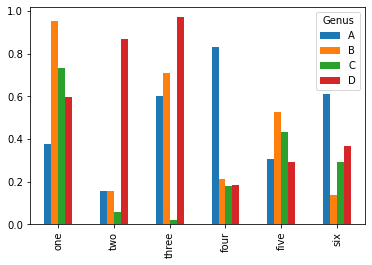

In [56]:
_ = df.plot.bar()
# Note that the name "Genus" on the DataFrame's columns is used to title the legend.

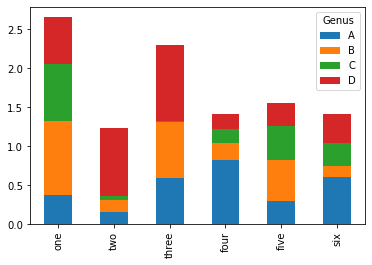

In [57]:
"""
Stacked bar plots are created from a DataFrame by passing stacked=True,
resulting in the value in each row being stacked together.
"""
_ = df.plot.bar(stacked=True)

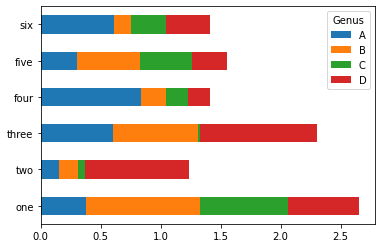

In [58]:
"""
Stacked bar plots are created from a DataFrame by passing stacked=True,
resulting in the value in each row being stacked together.
"""
# The same as above, yet horizontal
_ = df.plot.barh(stacked=True)

## Histograms and Density Plots

-  A **histogram** is a kind of bar plot that gives a discretized display of value frequency. 

-  The data points are split into discrete, evenly spaced **bins**, and the number of data points in each bin is plotted. 

-  It can be obtained by calling the <code>**plot.hist**</code> method on a <code>**Series**</code> object

## Histograms and Density Plots

-  A related plot type is a **density plot**, which is formed by computing an **_estimate_** of a **continuous probability distribution** that might have generated the observed data. 

-  A usual procedure is to approximate this distribution as a **mixture of "kernels"**, that is, simpler distributions like the Normal distribution. 

-  Thus, density plots are also known as **KDE** (kernel density estimate) plots. 

-  Using <code>**plot.kde**</code> makes a density plot using the conventional mixture-of-normals estimate

In [59]:
"""
Let's go back to our running example DataFrame of users.
"""
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
# The first line of the file represents the header, and each field
# is separated by a pipe

"""
We specify the url where the data is located, the character used to separate fields ('|')
and the name of the column to use as row label (otherwise, RangeInteger will be used)
"""
users = pd.read_csv(url, sep='|', index_col='user_id')
print(users.head())

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [87]:
# 1. For each user, extract an average salary value drawn from a Normal distribution.
# In other words, we need to drawn a sample from a Normal distribution, 
# whose size is equal to that of the users in our dataset.
# To do so, we need to specify the two parameters of the distribution: 
# mean (mu) and standard deviation (sigma)
np.random.seed(42)

mu = 35000

sigma = 10000


#########################################
###### NEED TO CLARIFY THIS POINT #######
#########################################

print("######################################### \n###### NEED TO CLARIFY THIS POINT ####### \n#########################################")
normal_salaries = np.random.normal(loc = mu, scale = sigma, size = users.shape[0])

print("\n")
max_salary = np.max(normal_salaries).round(decimals = 2)
print("Maximum Salary:", max_salary)

min_salary = np.min(normal_salaries).round(decimals = 2)
print("Minimum Salary:", min_salary)

print()


# Let's also round salaries to the 2nd decimal digit
normal_salaries = np.round(normal_salaries, decimals=2)

# Alternatively:
# np.round(normal_salaries, decimals=2, out=normal_salaries)
print(normal_salaries[:20])

######################################### 
###### NEED TO CLARIFY THIS POINT ####### 
#########################################


Maximum Salary: 73527.31
Minimum Salary: 2587.33

[39967.14 33617.36 41476.89 50230.3  32658.47 32658.63 50792.13 42674.35
 30305.26 40425.6  30365.82 30342.7  37419.62 15867.2  17750.82 29377.12
 24871.69 38142.47 25919.76 20876.96]


In [61]:
# 2. Let's add an extra 'salary' column to our 'users' DataFrame
# using the just created numpy array
users['salary'] = normal_salaries
print(users.head())

         age gender  occupation zip_code    salary
user_id                                           
1         24      M  technician    85711  39967.14
2         53      F       other    94043  33617.36
3         23      M      writer    32067  41476.89
4         24      M  technician    43537  50230.30
5         33      F       other    15213  32658.47


In [92]:
print("Max user age: ",users["age"].max())

users['age'].value_counts(bins = 10).sort_index()

Max user age:  73


(6.933, 13.6]      8
(13.6, 20.2]     101
(20.2, 26.8]     197
(26.8, 33.4]     221
(33.4, 40.0]     144
(40.0, 46.6]      94
(46.6, 53.2]     111
(53.2, 59.8]      36
(59.8, 66.4]      23
(66.4, 73.0]       8
Name: age, dtype: int64

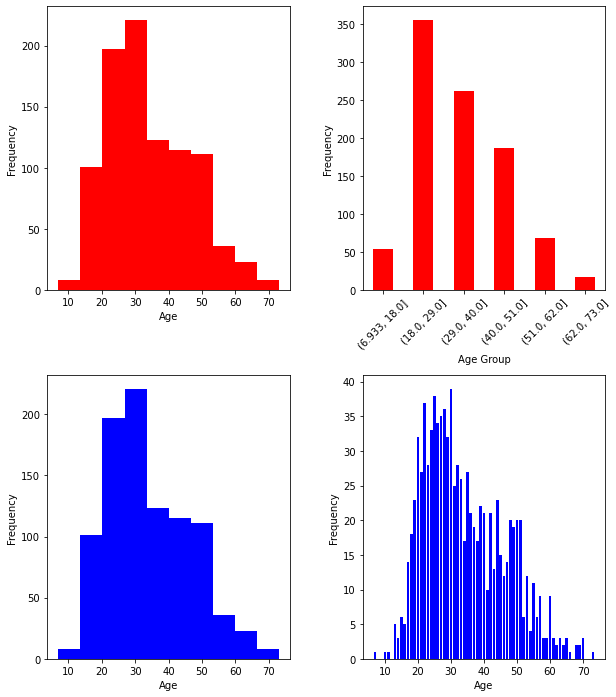

In [63]:
"""
Let's first plot the histogram cosort_indexng to the distribution
of 'age' values from our users DataFrame
"""
fig, axes = plt.subplots(2, 2, figsize=(10,12))

# Using pandas' instance object method 'plot.hist()'
_ = users['age'].plot.hist(ax=axes[0,0], color='r')
_ = axes[0,0].set_xlabel('Age')
_ = axes[0,0].set_ylabel('Frequency')

# Achieving a similar behavior using value_counts() and bar plot
_ = users['age'].value_counts(bins=6).sort_index().plot.bar(ax = axes[0,1], color='r', rot=45)
_ = axes[0,1].set_xlabel('Age Group'); _ = axes[0,1].set_ylabel('Frequency')

# Using matplotlib API
_ = axes[1,0].hist(users['age'], color='b')
_ = axes[1,0].set_xlabel('Age')
_ = axes[1,0].set_ylabel('Frequency')

dfu = users['age'].value_counts().sort_index()

_ = axes[1,1].bar(dfu.index, 
                  dfu.values, color='b')
_ = axes[1,1].set_xlabel('Age')
_ = axes[1,1].set_ylabel('Frequency')

plt.subplots_adjust(wspace=.3, hspace=.3)

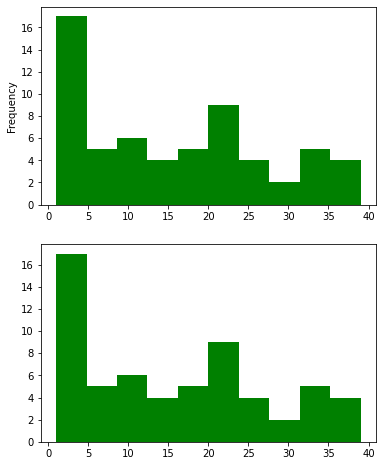

In [64]:
# NOTE: If we call .hist() on value_counts() we obtain the histogram of the histogram!
# In other words, we obtain the frequency distribution of frequency values
fig, axes = plt.subplots(2, 1, figsize=(6,8))
_ = users['age'].value_counts().sort_index().plot.hist(ax=axes[0], color='g')
_ = axes[1].hist(users['age'].value_counts().sort_index(), color='g')

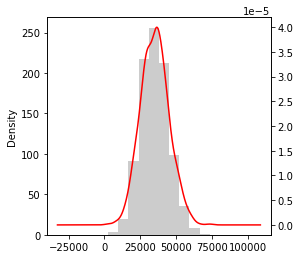

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Plot on the same AxesSubplot both histogram and density estimate
_ = users.salary.plot.hist(color='k', alpha=.2)
_ = users.salary.plot.density(ax=ax, color='r', secondary_y=True)

/Users/mattiagugole/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


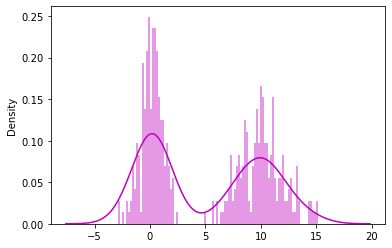

In [66]:
"""
Seaborn makes histograms and density plots even easier through its 'distplot' method, 
which can plot both a histogram and a continuous density estimate simultaneously.
"""
comp1 = np.random.normal(0, 1, size=200)  # Normal(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # Normal(10, 4)

# Create a Pandas Series from the two normally-distributed samples above
values = pd.Series(np.concatenate([comp1, comp2]))
_ = sns.distplot(values, bins=100, color='m')

## Visualize Pairwise Relationships

-  Point plots (also sometimes called **scatter plots**) can be a useful way of examining the relationship between two one-dimensional series. 

- It may be useful to look at _all_ the scatter plots among a group of variables; this is known as a **pairs plot** or **scatter plot matrix**. 

-  <code>**seaborn**</code> has a convenient <code>**pairplot**</code> function; it supports placing histograms or density estimates of each variable along the diagonal.

In [67]:
"""
Let's load the iris dataset which comes along with seaborn and
use it to demonstrate how 'pairplot' works.
"""
# Loading iris dataset
iris = sns.load_dataset("iris")

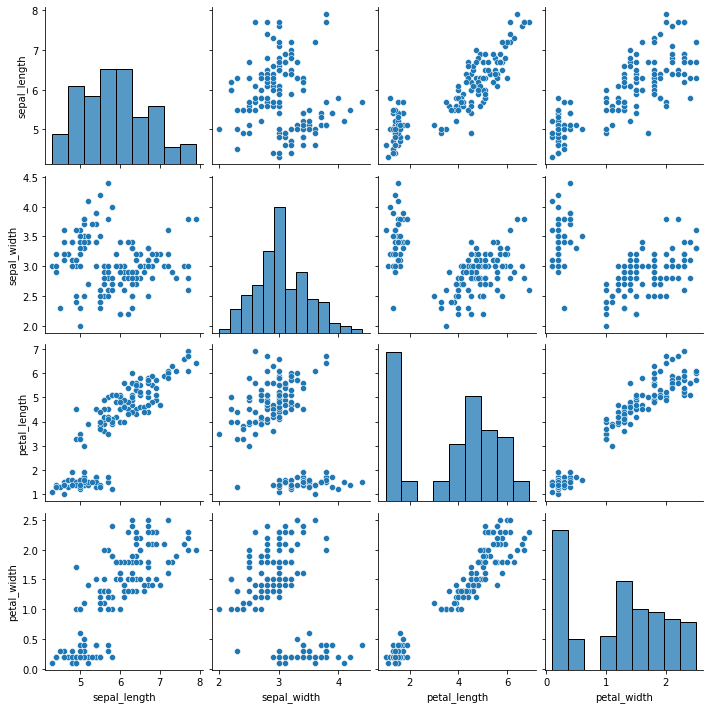

In [68]:
_ = sns.pairplot(iris)

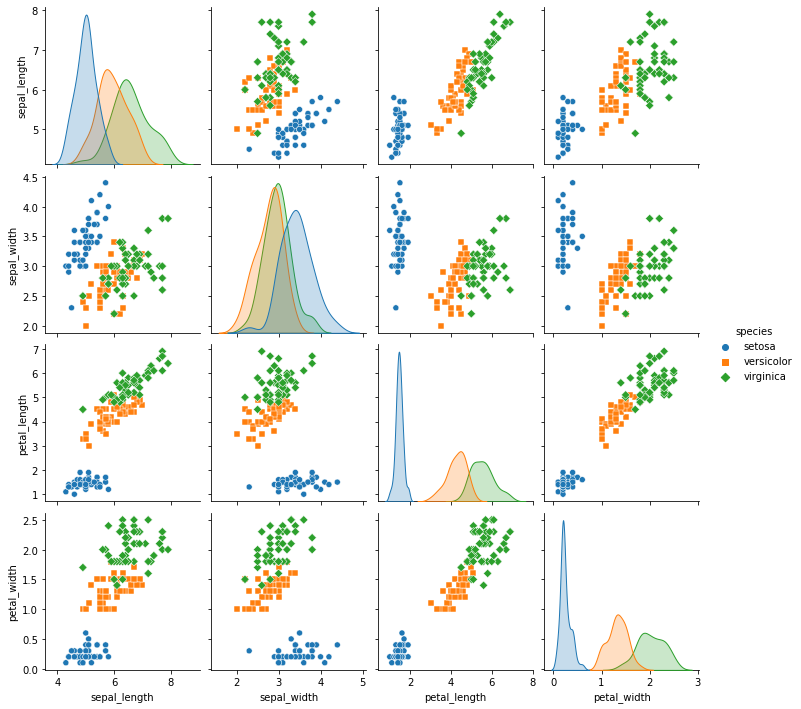

In [69]:
_ = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

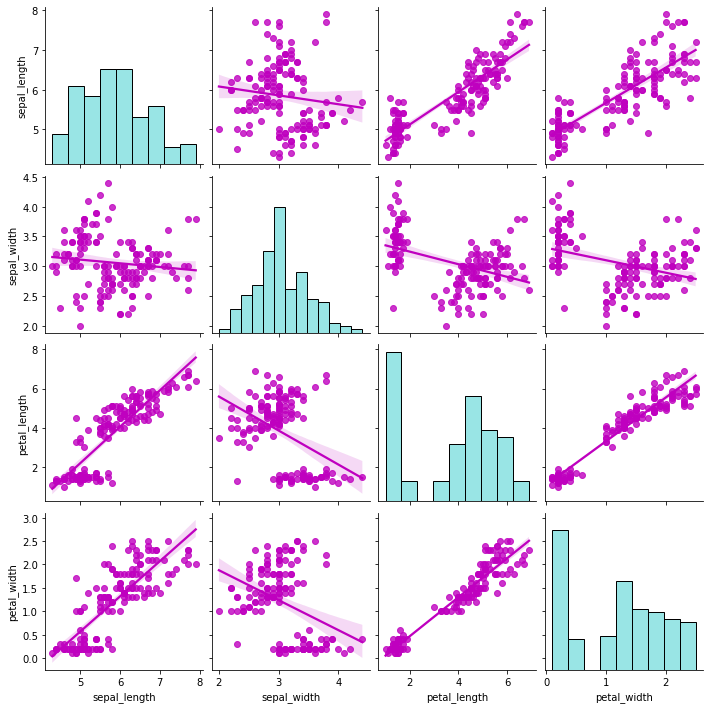

In [70]:
_ = sns.pairplot(iris, kind="reg",
                 diag_kind='hist',
                 diag_kws={'color': 'c', 'alpha': 0.4}, 
                 plot_kws={'color': 'm'})

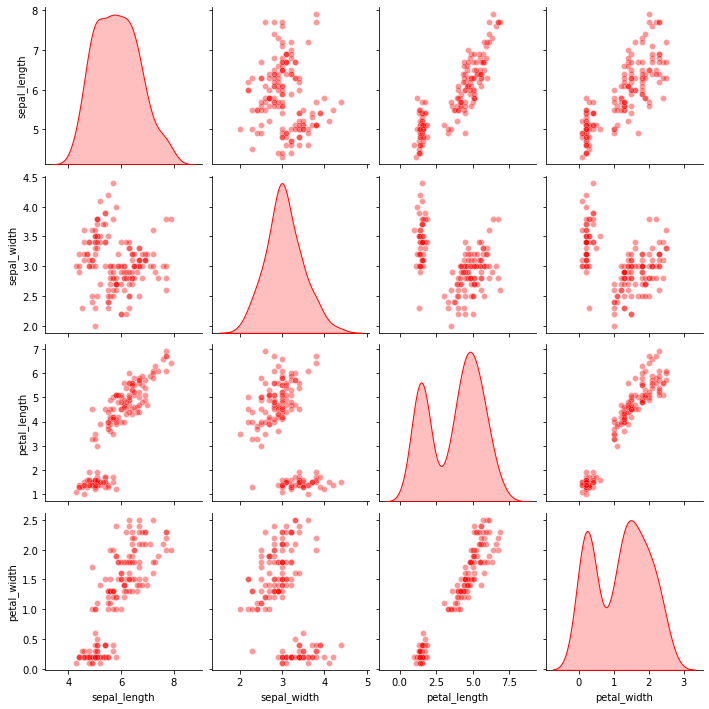

In [71]:
_ = sns.pairplot(iris, diag_kind='kde', 
                 diag_kws={'shade': True, 'color': 'r'}, 
                 plot_kws={'alpha': 0.4, 'color': 'r'})